In [1]:
# coding: utf-8
import sys
sys.path.append('..')
sys.path.append('../ch07')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from attention_seq2seq import AttentionSeq2seq
from ch07.seq2seq import Seq2seq
from ch07.peeky_seq2seq import PeekySeq2seq


# 데이터 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('date.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 문장 반전
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 256
batch_size = 128
max_epoch = 10
max_grad = 5.0

model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size)
# model.load_params('AttentionSeq2seq.pkl')
# model = Seq2seq(vocab_size, wordvec_size, hidden_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)

optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse=True)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('정확도 %.3f%%' % (acc * 100))


model.save_params()

# 그래프 그리기
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(-0.05, 1.05)
plt.show()


| 에폭 1 |  반복 1 / 703 | 시간 0[s] | 손실 2.83
| 에폭 1 |  반복 21 / 703 | 시간 3[s] | 손실 2.56
| 에폭 1 |  반복 41 / 703 | 시간 7[s] | 손실 2.08
| 에폭 1 |  반복 61 / 703 | 시간 11[s] | 손실 1.94
| 에폭 1 |  반복 81 / 703 | 시간 15[s] | 손실 1.82
| 에폭 1 |  반복 101 / 703 | 시간 19[s] | 손실 1.74
| 에폭 1 |  반복 121 / 703 | 시간 24[s] | 손실 1.68
| 에폭 1 |  반복 141 / 703 | 시간 29[s] | 손실 1.62
| 에폭 1 |  반복 161 / 703 | 시간 34[s] | 손실 1.57
| 에폭 1 |  반복 181 / 703 | 시간 38[s] | 손실 1.53
| 에폭 1 |  반복 201 / 703 | 시간 43[s] | 손실 1.50
| 에폭 1 |  반복 221 / 703 | 시간 48[s] | 손실 1.48
| 에폭 1 |  반복 241 / 703 | 시간 53[s] | 손실 1.51
| 에폭 1 |  반복 261 / 703 | 시간 59[s] | 손실 1.49
| 에폭 1 |  반복 281 / 703 | 시간 69[s] | 손실 1.47
| 에폭 1 |  반복 301 / 703 | 시간 76[s] | 손실 1.47
| 에폭 1 |  반복 321 / 703 | 시간 84[s] | 손실 1.48
| 에폭 1 |  반복 341 / 703 | 시간 91[s] | 손실 1.46
| 에폭 1 |  반복 361 / 703 | 시간 99[s] | 손실 1.46
| 에폭 1 |  반복 381 / 703 | 시간 106[s] | 손실 1.47
| 에폭 1 |  반복 401 / 703 | 시간 114[s] | 손실 1.46
| 에폭 1 |  반복 421 / 703 | 시간 121[s] | 손실 1.47
| 에폭 1 |  반복 441 / 703 | 시간 127[s] | 손

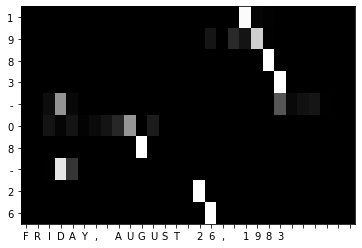

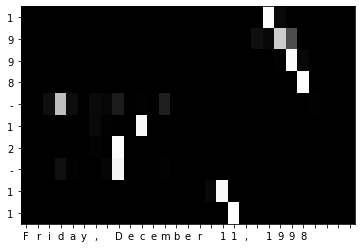

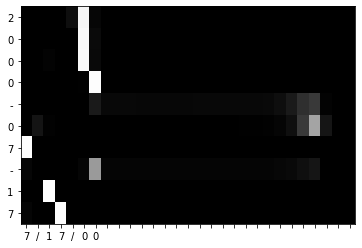

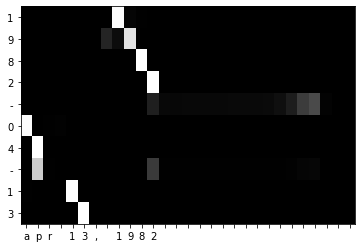

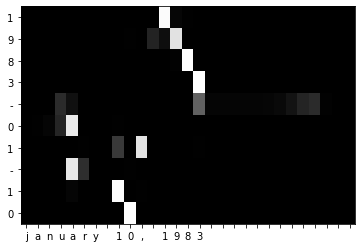

In [2]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
from dataset import sequence
import matplotlib.pyplot as plt
from attention_seq2seq import AttentionSeq2seq


(x_train, t_train), (x_test, t_test) = \
    sequence.load_data('date.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 문장 반전
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 256

model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size)
model.load_params()

_idx = 0
def visualize(attention_map, row_labels, column_labels):
    fig, ax = plt.subplots()
    ax.pcolor(attention_map, cmap=plt.cm.Greys_r, vmin=0.0, vmax=1.0)

    ax.patch.set_facecolor('black')
    ax.set_yticks(np.arange(attention_map.shape[0])+0.5, minor=False)
    ax.set_xticks(np.arange(attention_map.shape[1])+0.5, minor=False)
    ax.invert_yaxis()
    ax.set_xticklabels(row_labels, minor=False)
    ax.set_yticklabels(column_labels, minor=False)

    global _idx
    _idx += 1
    plt.show()


np.random.seed(1984)
for _ in range(5):
    idx = [np.random.randint(0, len(x_test))]
    x = x_test[idx]
    t = t_test[idx]

    model.forward(x, t)
    d = model.decoder.attention.attention_weights
    d = np.array(d)
    attention_map = d.reshape(d.shape[0], d.shape[2])

    # 출력하기 위해 반전
    attention_map = attention_map[:,::-1]
    x = x[:,::-1]

    row_labels = [id_to_char[i] for i in x[0]]
    column_labels = [id_to_char[i] for i in t[0]]
    column_labels = column_labels[1:]

    visualize(attention_map, row_labels, column_labels)
